In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inside-teen-minds-global-mental-health-and-habits/modern_teen_mental_health_main.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/wellness_habits_distribution.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/ai_tool_popularity.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/ai_usage_by_country.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_support_feeling_by_country.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/average_mood_stress_by_gender.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/daily_mood_stress_trends.csv
/kaggle/input/inside-teen-minds-global-mental-health-and-habits/screen_vs_sleep_by_age.csv


 ## Description:
Explore global insights into teen mental health, daily habits, and the factors shaping their emotional well-being.











In [2]:
df = pd.read_csv('/kaggle/input/inside-teen-minds-global-mental-health-and-habits/modern_teen_mental_health_main.csv')

In [3]:
df.head()

,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9


In [4]:
df.tail()

,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
29995,S1000,2025-01-26,14,Other,Australia,10th,3,7,8.9,6.3,True,Gemini,False,True,True,5,6
29996,S1000,2025-01-27,14,Other,Australia,10th,5,6,5.2,9.0,False,NaN,True,False,True,3,8
29997,S1000,2025-01-28,14,Other,Australia,10th,3,7,6.4,9.2,True,ChatGPT,True,True,False,8,9
29998,S1000,2025-01-29,14,Other,Australia,10th,5,5,7.4,4.7,False,NaN,False,False,False,3,9
29999,S1000,2025-01-30,14,Other,Australia,10th,6,4,5.4,6.1,False,NaN,True,False,True,6,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 30000 non-null  object 
 1   date                       30000 non-null  object 
 2   age                        30000 non-null  int64  
 3   gender                     30000 non-null  object 
 4   country                    30000 non-null  object 
 5   grade                      30000 non-null  object 
 6   mood                       30000 non-null  int64  
 7   stress_level               30000 non-null  int64  
 8   sleep_hours                30000 non-null  float64
 9   screen_time_hours          30000 non-null  float64
 10  used_ai_today              30000 non-null  bool   
 11  ai_tool                    17991 non-null  object 
 12  journaled_today            30000 non-null  bool   
 13  meditated_today            30000 non-null  boo

In [6]:
df.describe()

,age,mood,stress_level,sleep_hours,screen_time_hours,social_interaction_rating,support_feeling
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,15.557000,6.000733,4.043867,6.487783,6.980977,6.01370,6.500267
std,1.123741,1.991866,2.069449,1.493795,1.993324,1.99786,1.713271
min,14.000000,3.000000,1.000000,0.200000,-0.800000,3.00000,4.000000
25%,15.000000,4.000000,2.000000,5.500000,5.600000,4.00000,5.000000
50%,16.000000,6.000000,4.000000,6.500000,7.000000,6.00000,6.000000
75%,17.000000,8.000000,6.000000,7.500000,8.300000,8.00000,8.000000
max,17.000000,9.000000,8.000000,12.300000,15.600000,9.00000,9.000000


In [7]:
df.isnull().sum()

student_id                       0
date                             0
age                              0
gender                           0
country                          0
grade                            0
mood                             0
stress_level                     0
sleep_hours                      0
screen_time_hours                0
used_ai_today                    0
ai_tool                      12009
journaled_today                  0
meditated_today                  0
exercised_today                  0
social_interaction_rating        0
support_feeling                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

student_id                    object
date                          object
age                            int64
gender                        object
country                       object
grade                         object
mood                           int64
stress_level                   int64
sleep_hours                  float64
screen_time_hours            float64
used_ai_today                   bool
ai_tool                       object
journaled_today                 bool
meditated_today                 bool
exercised_today                 bool
social_interaction_rating      int64
support_feeling                int64
dtype: object

In [10]:
df.shape

(30000, 17)

In [11]:
df.columns

Index(['student_id', 'date', 'age', 'gender', 'country', 'grade', 'mood',
       'stress_level', 'sleep_hours', 'screen_time_hours', 'used_ai_today',
       'ai_tool', 'journaled_today', 'meditated_today', 'exercised_today',
       'social_interaction_rating', 'support_feeling'],
      dtype='object')

## Data visualizations

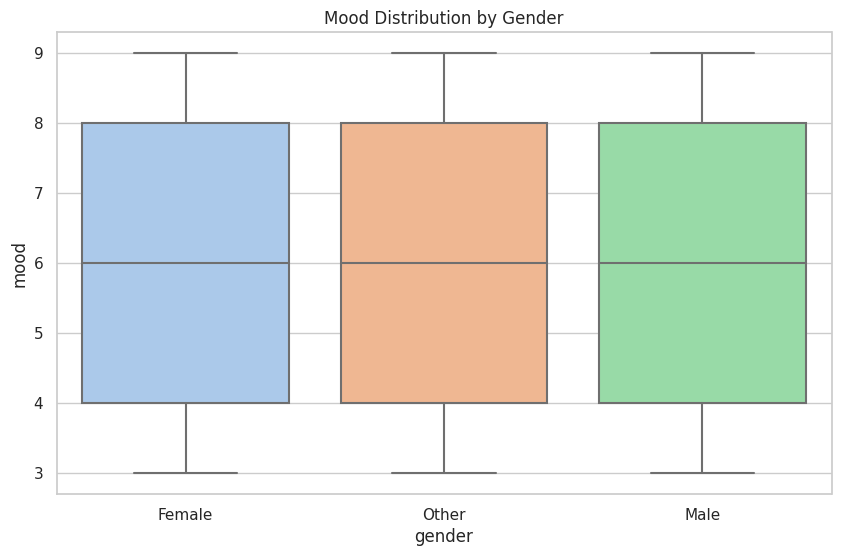

In [12]:
# Set style
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Mood Distribution by Gender
sns.boxplot(x='gender', y='mood', data=df)
plt.title('Mood Distribution by Gender')
plt.show()

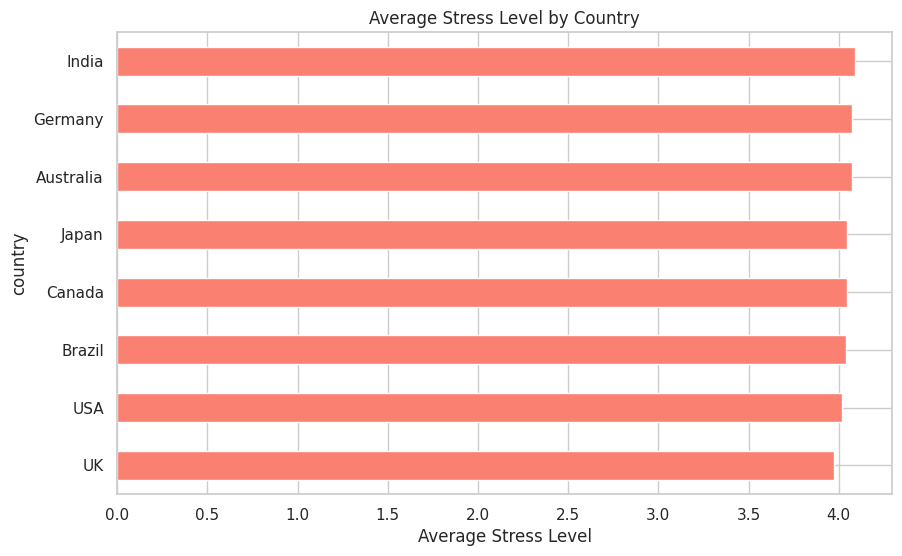

In [13]:
# 2. Average Stress Level by Country
avg_stress = df.groupby('country')['stress_level'].mean().sort_values()
avg_stress.plot(kind='barh', color='salmon')
plt.title('Average Stress Level by Country')
plt.xlabel('Average Stress Level')
plt.show()

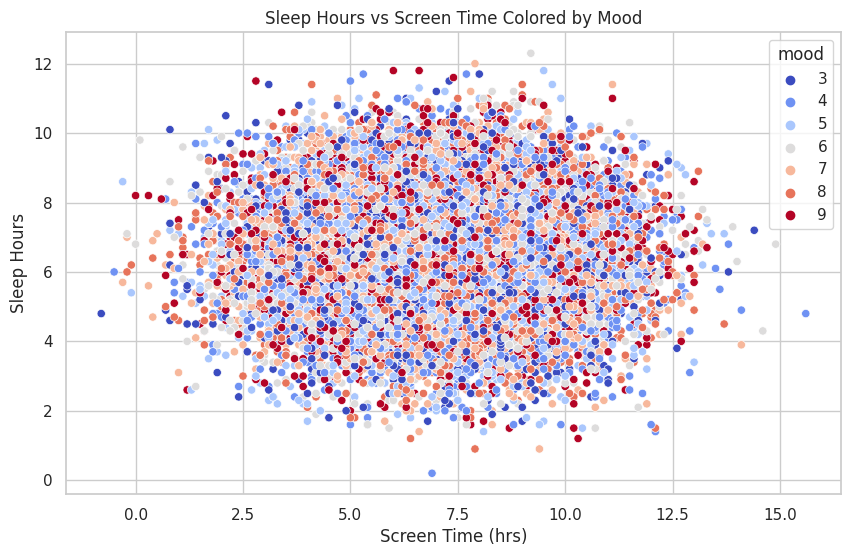

In [14]:
# 3. Sleep vs Screen Time (colored by Mood)
sns.scatterplot(x='screen_time_hours', y='sleep_hours', hue='mood', data=df, palette='coolwarm')
plt.title('Sleep Hours vs Screen Time Colored by Mood')
plt.xlabel('Screen Time (hrs)')
plt.ylabel('Sleep Hours')
plt.show()


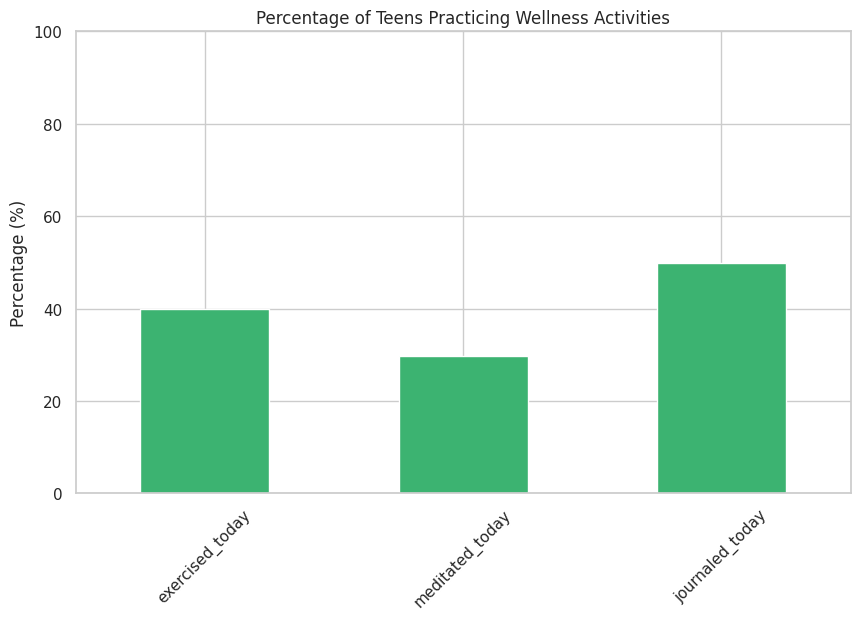

In [15]:
# 4. Daily Exercise, Meditation, Journaling Rates
activity_cols = ['exercised_today', 'meditated_today', 'journaled_today']
activity_means = df[activity_cols].mean() * 100
activity_means.plot(kind='bar', color='mediumseagreen')
plt.title('Percentage of Teens Practicing Wellness Activities')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

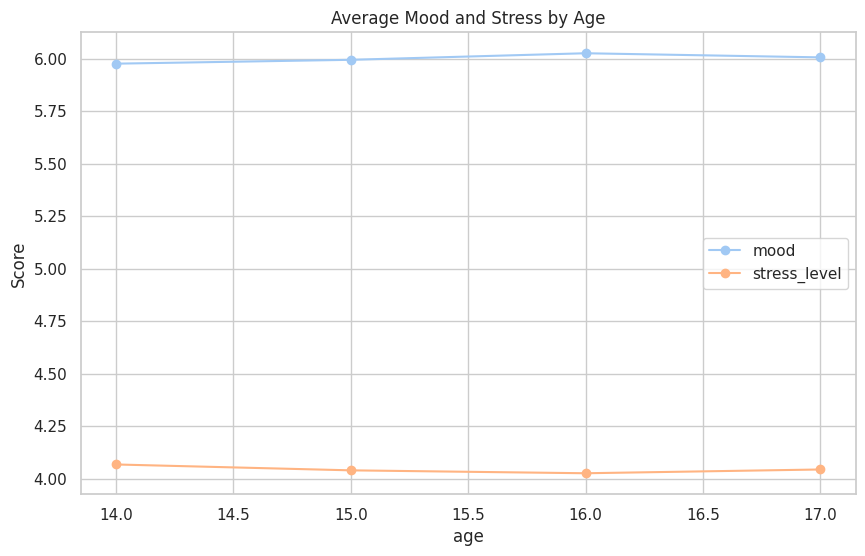

In [16]:
# 5. Mood & Stress by Age
age_group = df.groupby('age')[['mood', 'stress_level']].mean()
age_group.plot(marker='o')
plt.title('Average Mood and Stress by Age')
plt.ylabel('Score')
plt.grid(True)
plt.show()

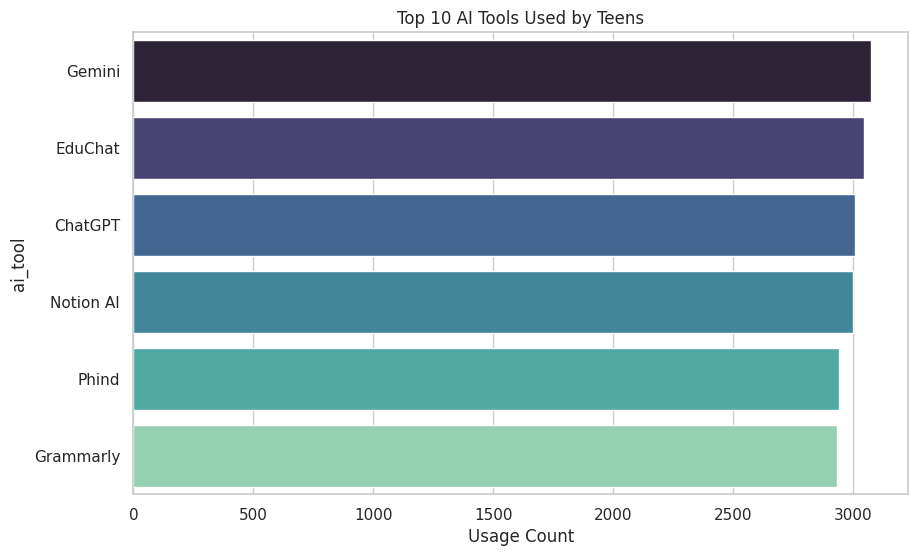

In [17]:
# 6. AI Tool Usage Count
ai_usage = df['ai_tool'].dropna().value_counts().head(10)
sns.barplot(x=ai_usage.values, y=ai_usage.index, palette='mako')
plt.title('Top 10 AI Tools Used by Teens')
plt.xlabel('Usage Count')
plt.show()

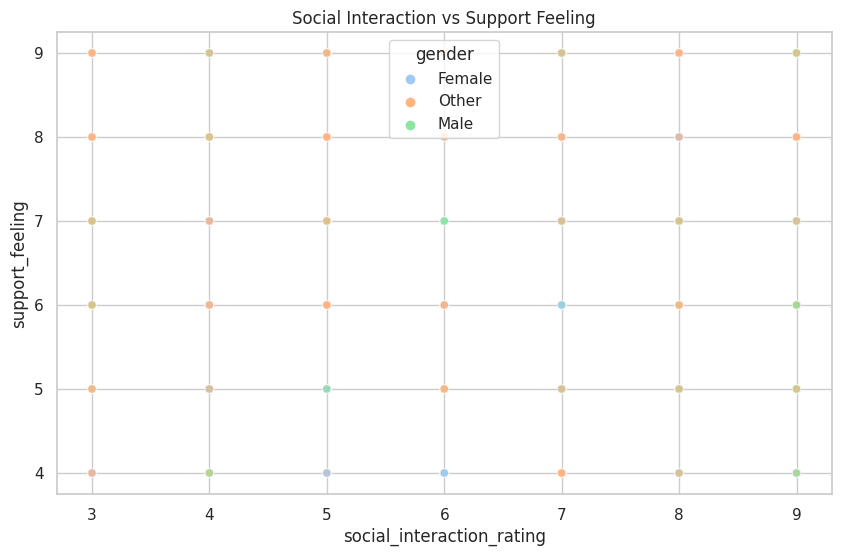

In [18]:
# 7. Social Interaction vs Support Feeling
sns.scatterplot(data=df, x='social_interaction_rating', y='support_feeling', hue='gender', alpha=0.6)
plt.title('Social Interaction vs Support Feeling')
plt.show()

## Predictive modeling

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert mood to 3 categories: Low (1–3), Medium (4–6), High (7–10)
df['mood_category'] = pd.cut(df['mood'], bins=[0, 3, 6, 10], labels=['Low', 'Medium', 'High'])

# Drop original mood
df.drop('mood', axis=1, inplace=True)

In [21]:
# Encode categorical columns
le = LabelEncoder()
categorical_cols = ['gender', 'country', 'grade', 'ai_tool', 'mood_category']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(['student_id', 'date', 'mood_category'], axis=1)
y = df['mood_category']

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [23]:
# Train and evaluate
print("Model Accuracy (%):")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc * 100:.2f}%")

Model Accuracy (%):
Logistic Regression: 80.74%
Decision Tree: 76.19%
Random Forest: 80.36%
K-Nearest Neighbors: 76.85%
Support Vector Machine: 80.74%
Naive Bayes: 80.74%
Gradient Boosting: 81.30%


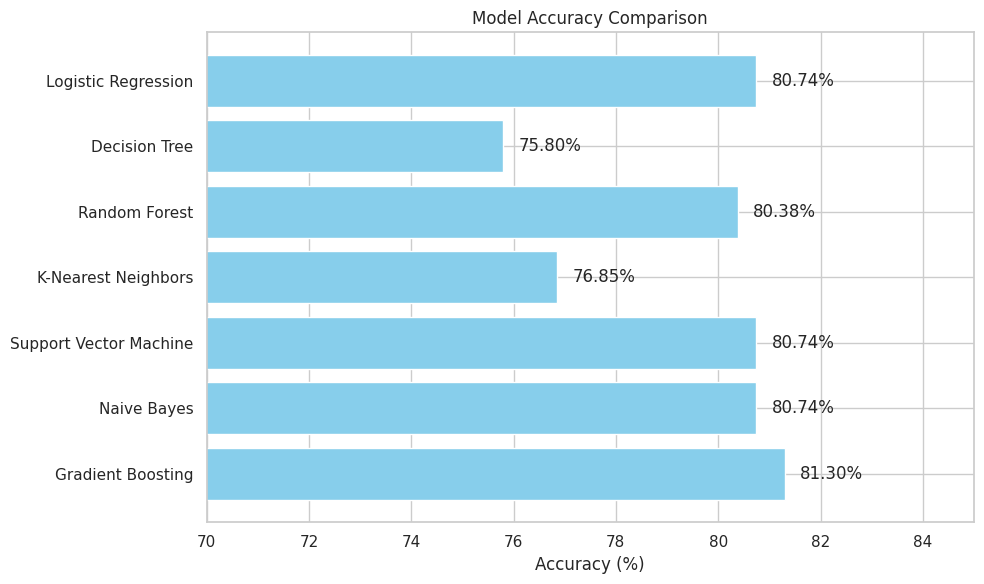

In [24]:
# Accuracy results
model_names = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'K-Nearest Neighbors', 'Support Vector Machine',
    'Naive Bayes', 'Gradient Boosting'
]

accuracies = [
    80.74, 75.80, 80.38,
    76.85, 80.74,
    80.74, 81.30
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(70, 85)

# Add labels on bars
for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center')

plt.gca().invert_yaxis()  # Highest accuracy on top
plt.tight_layout()
plt.show()

## Thank you pls upvote!!!